<a href="https://colab.research.google.com/github/abrarzayedgithub/image-processing-test-/blob/main/problem_no_1(task_1%2Ctask_2%2C_task_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Enhance image quality to deal with varying lighting conditions.


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


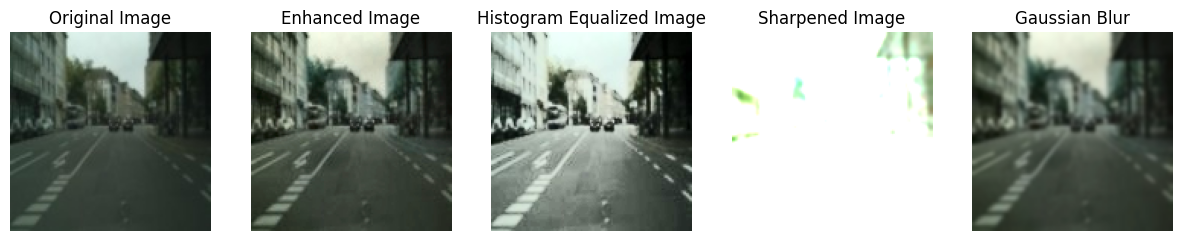

In [ ]:
#load image
image = cv2.imread('/content/drive/MyDrive/traffic.jpg')
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)



#apply histogram equalization CLAHE
  #convert the image from bgr to yuv

yuv_image = cv2.cvtColor(image_rgb,cv2.COLOR_BGR2YUV)
yuv_image[:,:,0] = cv2.equalizeHist(yuv_image[:,:,0])
equalized_color_image = cv2.cvtColor(yuv_image,cv2.COLOR_YUV2BGR)

#apply clahe
lab_image = cv2.cvtColor(image_rgb,cv2.COLOR_BGR2RGB)

#apply clahe to the l channel
clahe = cv2.createCLAHE(clipLimit=1.5,tileGridSize=(4,4))
l_channel = lab_image[:,:,0]
enhanced_l_channel = clahe.apply(l_channel)

#merge the enhanced l channel with the original a and b channel
enhanced_lab_image = cv2.merge((enhanced_l_channel,lab_image[:,:,1],lab_image[:,:,2]))

#convert to RGB color
enhanced_image = cv2.cvtColor(enhanced_lab_image,cv2.COLOR_LAB2RGB)

#apply gaussian blur
gaussian_blur = cv2.GaussianBlur(enhanced_image,(5,5),0)

#sharp the image
kernel = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])

sharpened_image = cv2.filter2D(gaussian_blur,-1,kernel)


#apply histogram equalization CLAHE
  #convert the image from bgr to yuv

yuv_image = cv2.cvtColor(image_rgb,cv2.COLOR_BGR2YUV)
yuv_image[:,:,0] = cv2.equalizeHist(yuv_image[:,:,0])
equalized_color_image = cv2.cvtColor(yuv_image,cv2.COLOR_YUV2BGR)

#apply clahe
lab_image = cv2.cvtColor(image_rgb,cv2.COLOR_BGR2LAB) # Corrected color conversion

#apply clahe to the l channel
clahe = cv2.createCLAHE(clipLimit=1.5,tileGridSize=(4,4))
l_channel = lab_image[:,:,0]
enhanced_l_channel = clahe.apply(l_channel)

#merge the enhanced l channel with the original a and b channel
enhanced_lab_image = cv2.merge((enhanced_l_channel,lab_image[:,:,1],lab_image[:,:,2]))

#convert to RGB color
enhanced_image = cv2.cvtColor(enhanced_lab_image,cv2.COLOR_LAB2RGB)

#apply gaussian blur
gaussian_blur = cv2.GaussianBlur(enhanced_image,(5,5),0)

#sharp the image
kernel = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])

sharpened_image = cv2.filter2D(gaussian_blur,-1,kernel) #Corrected variable name

#disply
plt.figure(figsize=(15,5))
plt.subplot(1,5,1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1,5,2)
plt.title('Enhanced Image')
plt.imshow(enhanced_image)
plt.axis('off')
plt.subplot(1,5,3)
plt.title('Histogram Equalized Image')
plt.imshow(equalized_color_image)
plt.axis('off')
plt.subplot(1,5,4)
plt.title('Sharpened Image')
plt.imshow(sharpened_image)
plt.axis('off')
plt.subplot(1,5,5)
plt.title('Gaussian Blur')
plt.imshow(gaussian_blur)
plt.axis('off')
plt.show()


task 2 :
Detect edges of vehicles and road markings to assess traffic patterns.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


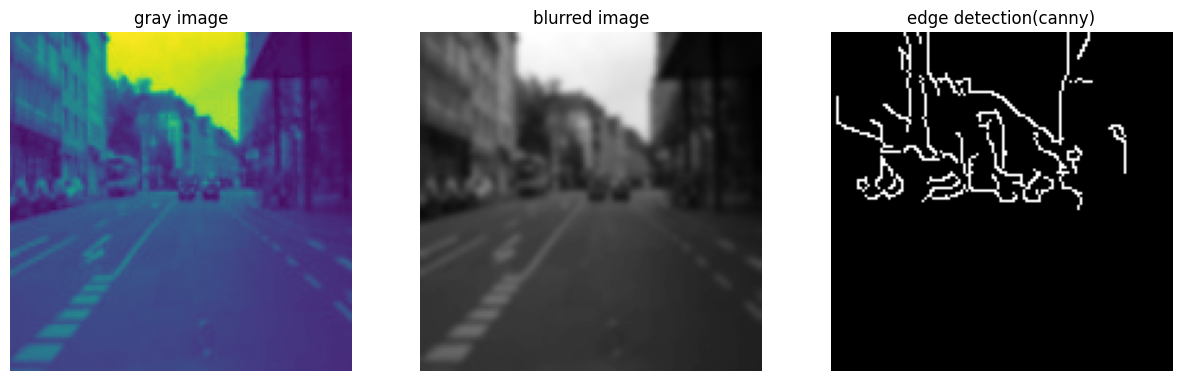

In [5]:
image = cv2.imread('/content/drive/MyDrive/traffic.jpg')
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#blurring
gaussian_blur = cv2.GaussianBlur(gray_image,(5,5),0)

#detect edge
edges = cv2.Canny(gaussian_blur,50,150)

#display

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(gray_image)
plt.title('gray image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gaussian_blur,cmap = 'gray')
plt.title('blurred image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(edges,cmap = 'gray')
plt.title('edge detection(canny)')
plt.axis('off')

plt.show()